In [1]:
import sys
sys.path.append('../..')

## Load trained model

In [4]:
from vae_mnist import VariationalAutoEncoder

checkpoint_path = '../../lightning_logs/vae_mnist/version_0/checkpoints/epoch=199-step=374999.ckpt'
model = VariationalAutoEncoder.load_from_checkpoint(checkpoint_path)
model.eval()

VariationalAutoEncoder(
  (encoder): Encoder(
    (conv_layers): Sequential(
      (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): LeakyReLU(negative_slope=0.01)
      (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Dropout(p=0.25, inplace=False)
      (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (5): LeakyReLU(negative_slope=0.01)
      (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (7): Dropout(p=0.25, inplace=False)
      (8): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (9): LeakyReLU(negative_slope=0.01)
      (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (11): Dropout(p=0.25, inplace=False)
      (12): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): LeakyReLU(negative_slope=0.01)
      (14): BatchNorm2d(64, eps=1e-05, moment

In [5]:
model.encoder

Encoder(
  (conv_layers): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.25, inplace=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): LeakyReLU(negative_slope=0.01)
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.25, inplace=False)
    (8): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (9): LeakyReLU(negative_slope=0.01)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.25, inplace=False)
    (12): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): LeakyReLU(negative_slope=0.01)
    (14): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (15): Dropout(p=0.

## Load test data

In [6]:
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms

val_dataset = MNIST(root='../../data', train=False, transform=transforms.ToTensor(), download=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=10, shuffle=True)

In [7]:
imgs, labels = next(iter(val_loader))
imgs.shape, labels

(torch.Size([10, 1, 28, 28]), tensor([2, 6, 2, 6, 1, 9, 5, 2, 8, 3]))

## Reconstruction

In [8]:
mu, logvar = model.encoder(imgs)
mu.shape

torch.Size([10, 2])

In [9]:
z = model.reparameterize(mu, logvar)
recon_imgs = model.decoder(z)
recon_imgs.shape

torch.Size([10, 1, 28, 28])

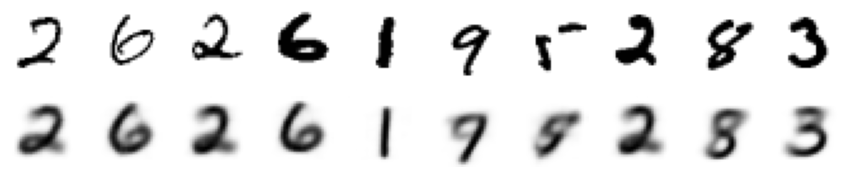

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 3))

for i in range(10):
    img = imgs[i].squeeze()
    ax = fig.add_subplot(2, 10, i + 1)
    ax.axis('off')
    ax.imshow(img, cmap='gray_r')

for i in range(10):
    img = recon_imgs[i].squeeze().detach().numpy()
    ax = fig.add_subplot(2, 10, i + 10 + 1)
    ax.axis('off')
    ax.imshow(img, cmap='gray_r')

## Latent space

In [11]:
val_loader = DataLoader(dataset=val_dataset, batch_size=5000, shuffle=True)
imgs, labels = next(iter(val_loader))
imgs.shape, labels.shape

(torch.Size([5000, 1, 28, 28]), torch.Size([5000]))

In [12]:
mu, logvar = model.encoder(imgs)
mu = mu.detach().numpy()
logvar = logvar.detach().numpy()
mu.shape, logvar.shape

((5000, 2), (5000, 2))

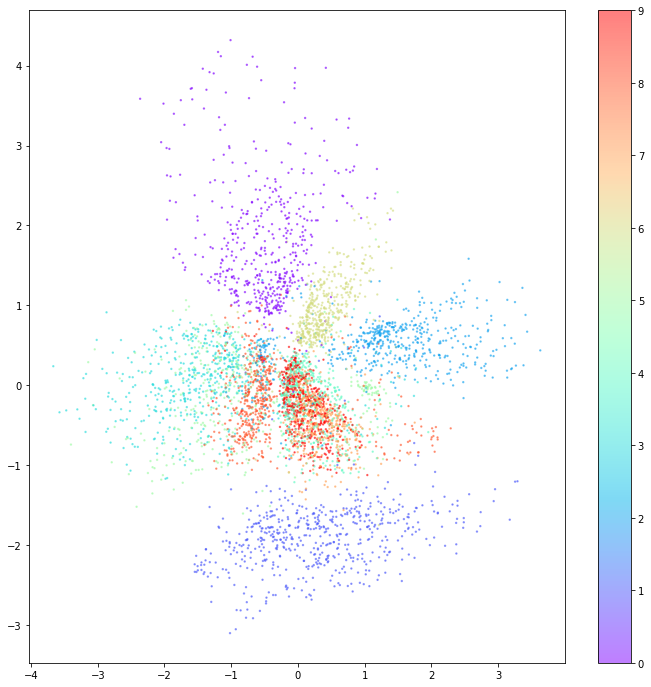

In [13]:
plt.figure(figsize=(12, 12))
plt.scatter(mu[:, 0], mu[:, 1], cmap='rainbow', c=labels, alpha=0.5, s=2)
plt.colorbar()
plt.show()